In [1]:
%matplotlib notebook

In [2]:
#Importing necessary packages

import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
import re
from matplotlib.lines import Line2D  # for legend handle
from tqdm import tqdm

In [4]:
kpi_df = pd.read_csv('ranking kpi.csv')
kpi_df.sort_values('kpi',inplace=True, ascending=False)
kpi_df.reset_index(inplace=True, drop=True)

pbar = tqdm(total=len(kpi_df))
for index, row in kpi_df.iterrows():
    filename = f'{re.sub("[^0-9]", "", row["CNPJ_FUNDO"])}.csv'
    nome = row['nomeAbreviado']
    
    cnpj_desempenho = pd.read_csv(f'CNPJ Desempenho/{filename}')
    if index == 0:
        cotas_df = pd.DataFrame()
        cotas_df['DT_COMPTC'] = cnpj_desempenho['DT_COMPTC']
        cotas_df[nome] = cnpj_desempenho['VL_QUOTA']
    else: 
        cotas_df = pd.merge(cotas_df, cnpj_desempenho[['DT_COMPTC', 'VL_QUOTA']], on='DT_COMPTC', how='left')
        cotas_df.rename(columns={'VL_QUOTA': nome}, inplace=True)
    pbar.update()

cotas_df = cotas_df.dropna(how='any',axis=0) 

100%|██████████████████████████████████████████████████████████████████████████████| 1571/1571 [02:40<00:00,  9.69it/s]

In [14]:
cotas_df.to_csv('cotas_for_graph.csv', index=False)

In [5]:
def volatility(df):
    dr = daily_returns(df)
    return dr.std()

def sharpe (ret,vol):
    return ret/vol

In [6]:
df1 = cotas_df.set_index('DT_COMPTC')

In [9]:
#Calculate daily changes in the stocks' value
df2 = df1.pct_change()
#Remove nan values at the first row of df2. Create a new dataframe df
daily_return = df2.iloc[1:len(df2.index),:]
# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.
annualized_return_list = np.mean(daily_return,axis=0)*252

volatility_list = np.std(daily_return, axis=0) *np.sqrt(252)

sharpe_list = sharpe(annualized_return_list, volatility_list)

classe_list = kpi_df[['nomeAbreviado', 'classe']]
classe_list.loc[classe_list['classe'] == '0', ['classe']] = 'Outros'
classe_list = classe_list.set_index('nomeAbreviado', drop=True)
classe_list = classe_list.iloc[:,0]

kpi_value = kpi_df[['nomeAbreviado', 'kpi']]
kpi_value = kpi_value.set_index('nomeAbreviado', drop=True)
kpi_value = kpi_value.iloc[:,0]

In [10]:
names_list = volatility_list.index.to_list()

i = 0
while i < len(names_list):
    names_list[i] = f' {kpi_value[i]}, {names_list[i]}'
    i+=1

In [11]:
plt.style.use('default')


<IPython.core.display.Javascript object>


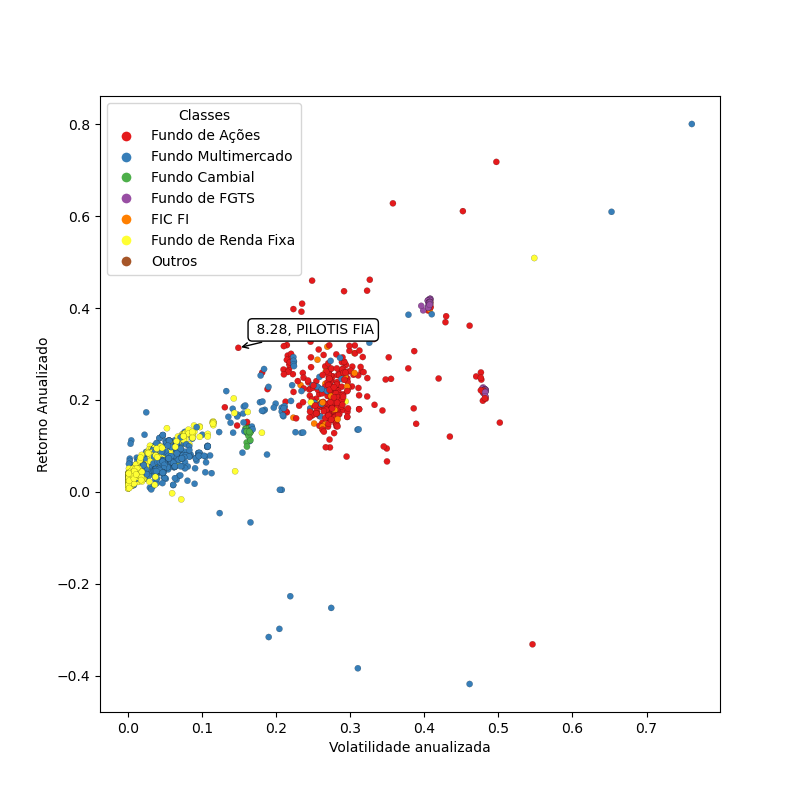

In [62]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = volatility_list
y = annualized_return_list

names = np.array(names_list)


colors = {'Fundo de Ações':plt.cm.Set1(0), 
         'Fundo Multimercado':plt.cm.Set1(1),
         'Fundo Cambial':plt.cm.Set1(2),
         'Fundo de FGTS':plt.cm.Set1(3),
         'FIC FI':plt.cm.Set1(4),
         'Fundo de Renda Fixa':plt.cm.Set1(5),
         'Outros':plt.cm.Set1(6)}

c = classe_list.map(colors)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots(figsize=(8,8))
sc = plt.scatter(x,y,c=c, s=20, edgecolors='black', linewidths=0.1)

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]

ax.legend(title='Classes', handles=handles, bbox_to_anchor=(0, 1), loc='upper left')


annot = ax.annotate("", xy=(0,0), xytext=(10,10), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(True)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(True)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.xlabel('Volatilidade anualizada')
plt.ylabel('Retorno Anualizado')


plt.show()

<IPython.core.display.Javascript object>


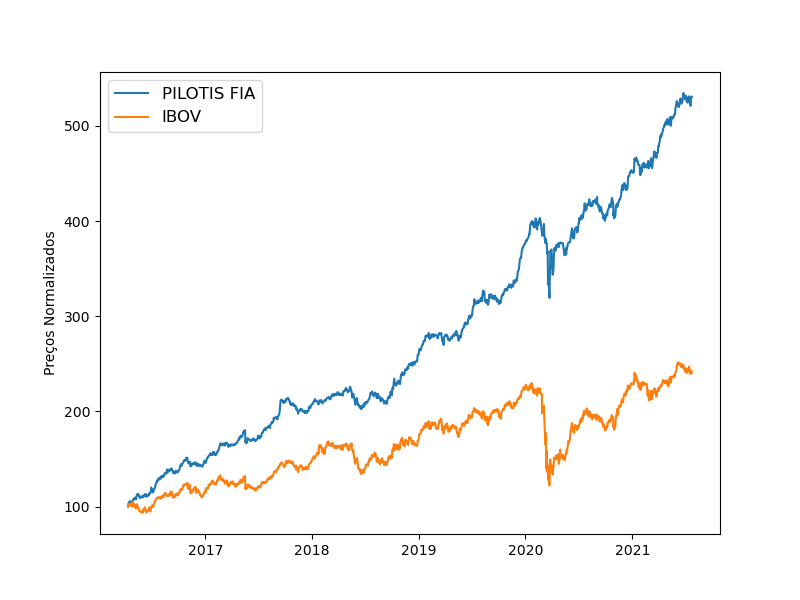

In [38]:
kpi_df = pd.read_csv('ranking kpi.csv')

kpi_acoes_df = kpi_df.loc[((kpi_df.nomeAbreviado == 'PILOTIS FIA'))]
kpi_acoes_df.reset_index(inplace=True, drop=True)

for index, row in kpi_acoes_df.iterrows():
    filename = f'{re.sub("[^0-9]", "", row["CNPJ_FUNDO"])}.csv'
    nome = row['nomeAbreviado']
    
    cnpj_desempenho = pd.read_csv(f'CNPJ Desempenho/{filename}')
    if index == 0:
        cotas_df = pd.DataFrame()
        cotas_df['DT_COMPTC'] = cnpj_desempenho['DT_COMPTC']
        cotas_df[nome] = cnpj_desempenho['VL_QUOTA']
    else: 
        cotas_df = pd.merge(cotas_df, cnpj_desempenho[['DT_COMPTC', 'VL_QUOTA']], on='DT_COMPTC', how='left')
        cotas_df.rename(columns={'VL_QUOTA': nome}, inplace=True)

cotas_df = cotas_df.dropna(how='any',axis=0) 

ibov = pd.read_csv('ibov.csv')
ibov = ibov[['Date', 'Adj Close']]
ibov.columns = ['DT_COMPTC', 'IBOV']

cotas_df = pd.merge(cotas_df, ibov, on='DT_COMPTC', how='left')
cotas_df.fillna(method='ffill', inplace=True)
cotas_df['DT_COMPTC'] = pd.to_datetime(cotas_df['DT_COMPTC'])
df1 = cotas_df.set_index('DT_COMPTC')

df3 = df1.divide(df1.iloc[0] / 100)

plt.figure(figsize=(8, 6))
for i in range(df3.shape[1]):
    plt.plot(df3.iloc[:,i], label=df3.columns.values[i])
plt.legend(loc='upper left', fontsize=12)



plt.ylabel('Preços Normalizados')

plt.show()



<IPython.core.display.Javascript object>


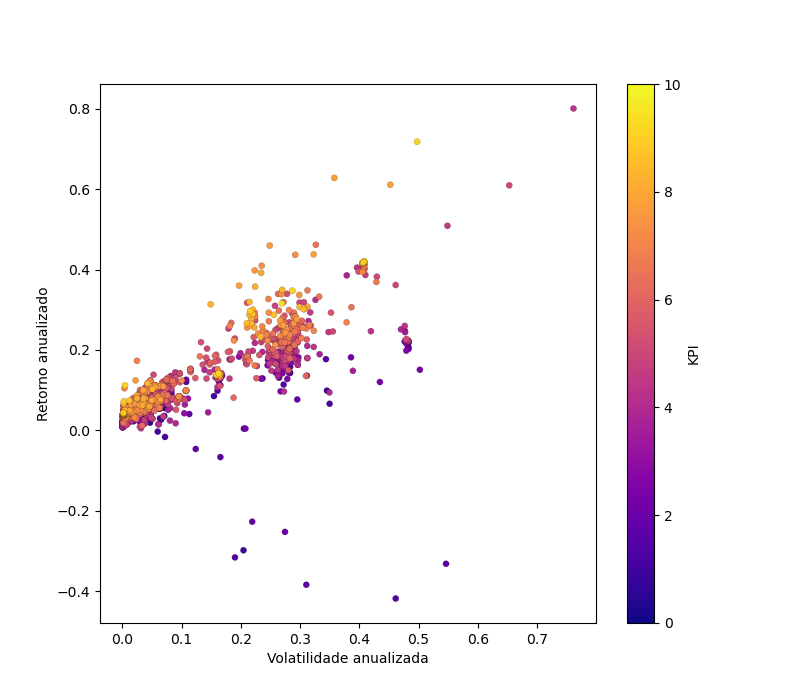

In [61]:
ret_arr = annualized_return_list.iloc[::-1]
vol_arr = volatility_list.iloc[::-1]


    
kpi_arr = kpi_value.iloc[::-1]

plt.figure(figsize=(8,7))
plt.scatter(vol_arr, ret_arr, c=kpi_arr, cmap='plasma', s=20, edgecolors='black', linewidths=0.1, vmin=0, vmax=10)

annot = ax.annotate("", xy=(0,0), xytext=(10,10),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(True)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(True)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.colorbar(label='KPI')
plt.xlabel('Volatilidade anualizada')
plt.ylabel('Retorno anualizado')
plt.show()